The purpose of this script is to compare Kalman filtering using autogressive MA vs. LS filter. 

In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

from kf.armakf import autokf as akf


In [16]:
test_case_list = [19] #[int(sys.argv[1])]
var_list = [1] #[int(sys.argv[2])]
#noise_label = ['1/f', 'white', '1/f', 'white', 'ohmic']
color_list = ['b', 'g', 'm', 'c', 'orange']

NUM_CASES = len(test_case_list)

for idx_case in xrange(NUM_CASES):

    test_case = test_case_list[idx_case]
    var = var_list[idx_case]
    ls_data = np.load('../ls_filter/test_case_'+str(test_case)+'/test_case_'+str(test_case)+'_var_'+str(var)+'_LS_Ensemble.npz')

    macro_weights=ls_data['macro_weights']
    macro_truths=ls_data['macro_truths']
    macro_data=ls_data['macro_data']
    n_predict = ls_data['n_predict']
     
    choose_one = 13
    stps_fwd = int(1)
    y_signal = macro_data[choose_one, :]
    weights = macro_weights[choose_one, stps_fwd,:, 0] # Use one-step ahead prediction weights.
    oe = 0.0
    rk = 100000.0
    predictions = akf('tc_'+str(test_case)+'_v_'+str(var), y_signal[1900:], weights, oe, rk, 
                             n_train=100, n_testbefore=50, n_predict=n_predict, p0=0.0, skip_msmts=1)
    

    truth = macro_truths[choose_one, :]
    ls_predictions = ls_data['macro_predictions'][choose_one, :, 0]
    

In [17]:
n_predict

array(50)

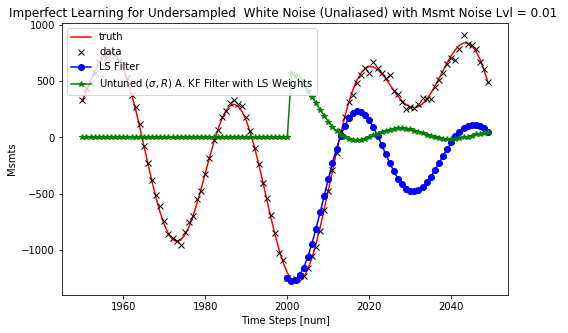

In [18]:
x_axis = np.arange(2100)

plt.figure(figsize=(8,5))
plt.title('Imperfect Learning for Undersampled  White Noise (Unaliased) with Msmt Noise Lvl = %s ' %(0.01))
plt.xlabel('Time Steps [num]')
plt.ylabel('Msmts')
plt.plot(x_axis[1950:2050], truth[1950:2050], 'r', label='truth')
plt.plot(x_axis[1950:2050], y_signal[1950:2050], 'kx', label='data')
plt.plot(x_axis[2000:2050], ls_predictions, 'bo-', label='LS Filter')
plt.plot(x_axis[1950:2050], predictions[0:n_predict + 50], 'g*-', label='Untuned ($\sigma, R$) A. KF Filter with LS Weights')
plt.legend(loc=2)
plt.show()